<a href="https://colab.research.google.com/github/Vamshi-B558/OIBSIP-Data_Analytics/blob/main/Cleaning_Data.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [35]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [36]:
df = pd.read_csv("/content/AB_NYC_2019.csv")

In [37]:
df.head(5)

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,2539,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,2018-10-19,0.21,6,365
1,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,2019-05-21,0.38,2,355
2,3647,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,NaN,NaN,1,365
3,3831,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,2019-07-05,4.64,1,194
4,5022,Entire Apt: Spacious Studio/Loft by central park,7192,Laura,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,2018-11-19,0.10,1,0


In [38]:
df.shape

(48895, 16)

In [39]:
df.isnull().sum()


id                                    0
name                                 16
host_id                               0
host_name                            21
neighbourhood_group                   0
neighbourhood                         0
latitude                              0
longitude                             0
room_type                             0
price                                 0
minimum_nights                        0
number_of_reviews                     0
last_review                       10052
reviews_per_month                 10052
calculated_host_listings_count        0
availability_365                      0
dtype: int64

In [40]:
df = df.drop(["id","name","host_id","host_name"],axis=1)

<Axes: ylabel='reviews_per_month'>

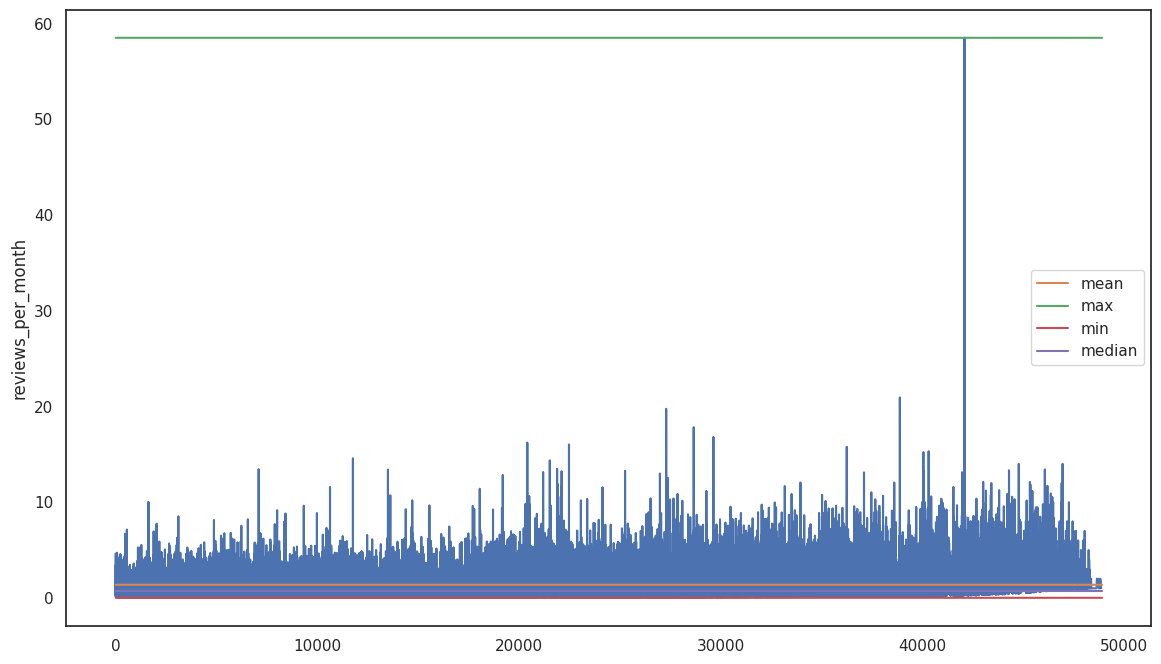

In [41]:
fig, ax = plt.subplots(figsize=(14, 8))
sns.lineplot(x=[i for i in range(48895)], y=df.reviews_per_month)
sns.lineplot(x=[i for i in range(48895)], y=df.reviews_per_month.mean(),label="mean")
sns.lineplot(x=[i for i in range(48895)], y=df.reviews_per_month.max(),label="max")
sns.lineplot(x=[i for i in range(48895)], y=df.reviews_per_month.min(),label="min")
sns.lineplot(x=[i for i in range(48895)], y=df.reviews_per_month.median(),label="median")

In [42]:
df['reviews_per_month'] = df.reviews_per_month.fillna(df.reviews_per_month.mean())

In [43]:
df['last_review'] = df.last_review.fillna(str(df.last_review.mode()).split()[1])

In [44]:
df.isnull().sum()

neighbourhood_group               0
neighbourhood                     0
latitude                          0
longitude                         0
room_type                         0
price                             0
minimum_nights                    0
number_of_reviews                 0
last_review                       0
reviews_per_month                 0
calculated_host_listings_count    0
availability_365                  0
dtype: int64

In [45]:
df.describe()

,latitude,longitude,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
count,48895.000000,48895.000000,48895.000000,48895.000000,48895.000000,48895.000000,48895.000000,48895.000000
mean,40.728949,-73.952170,152.720687,7.029962,23.274466,1.373221,7.143982,112.781327
std,0.054530,0.046157,240.154170,20.510550,44.550582,1.497775,32.952519,131.622289
min,40.499790,-74.244420,0.000000,1.000000,0.000000,0.010000,1.000000,0.000000
25%,40.690100,-73.983070,69.000000,1.000000,1.000000,0.280000,1.000000,0.000000
50%,40.723070,-73.955680,106.000000,3.000000,5.000000,1.220000,1.000000,45.000000
75%,40.763115,-73.936275,175.000000,5.000000,24.000000,1.580000,2.000000,227.000000
max,40.913060,-73.712990,10000.000000,1250.000000,629.000000,58.500000,327.000000,365.000000


<Axes: xlabel='latitude', ylabel='longitude'>

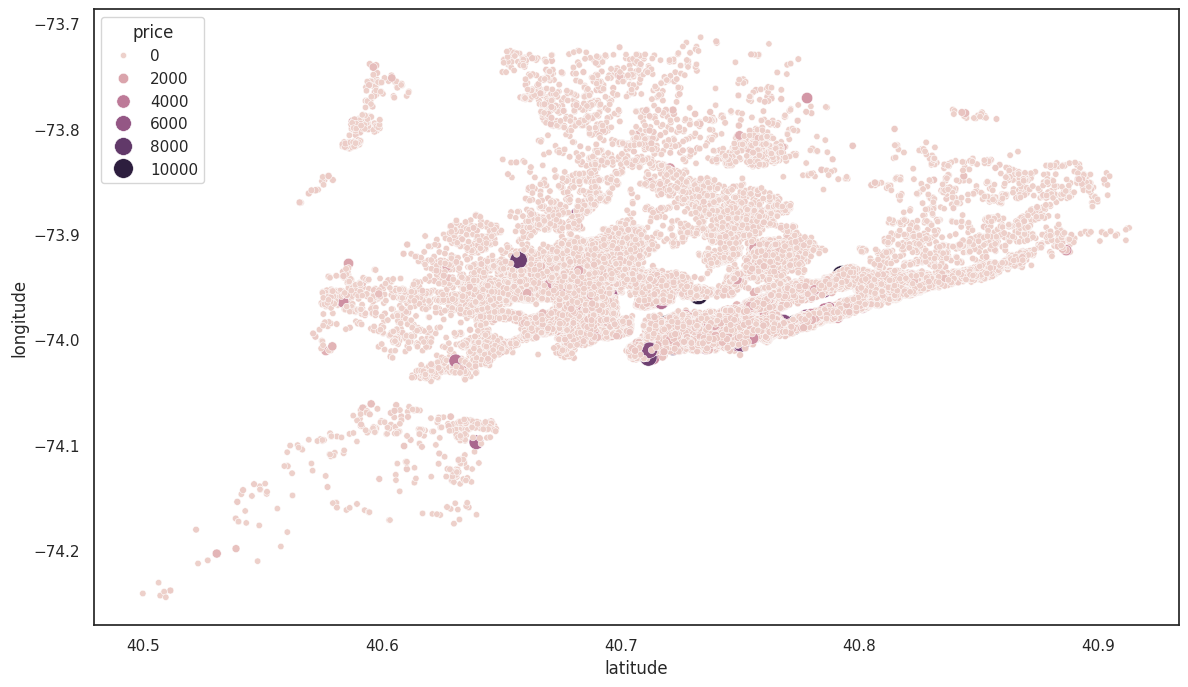

In [46]:
fig, ax = plt.subplots(figsize=(14, 8))
sns.scatterplot(x=df.latitude,y=df.longitude, size=df.price, hue=df.price,alpha=1,
                sizes=(20, 200))

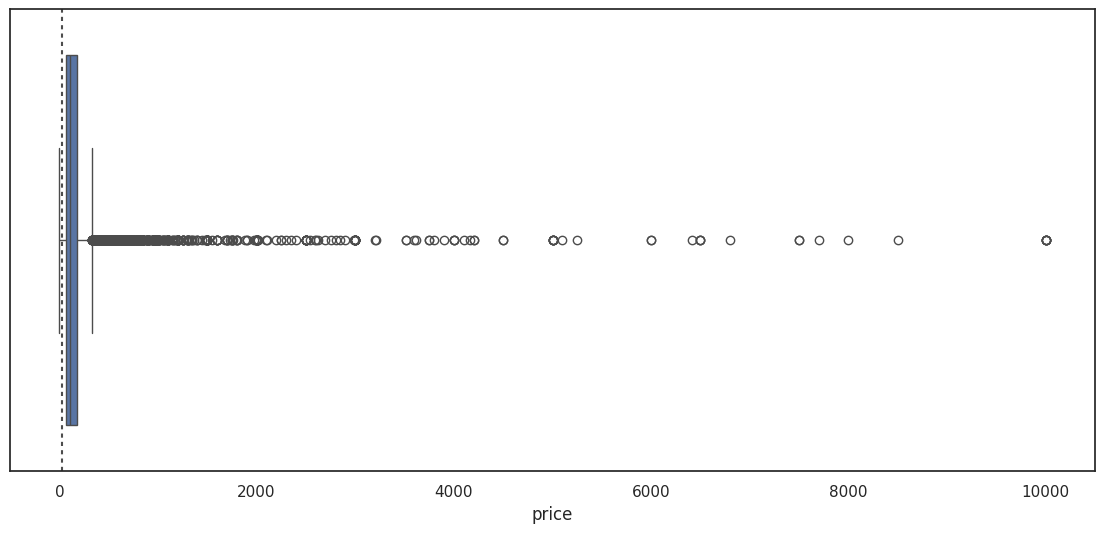

In [47]:
fig, ax = plt.subplots(figsize=(14, 6))
ax = sns.boxplot(x=df.price)
ax.axvline(25, color=".3", dashes=(2, 2))

In [48]:
def high_low_range(data):
    low = data.quantile(0.1)
    high = data.quantile(0.99)
    return low,high

In [49]:
low, high = high_low_range(df.price)
print(low, high)
df_new = df[(df.price<=high) & (df.price>=low)]

49.0 799.0


In [50]:
df_new.describe()

,latitude,longitude,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
count,43739.000000,43739.000000,43739.000000,43739.00000,43739.000000,43739.000000,43739.000000,43739.000000
mean,40.730177,-73.954769,148.122431,6.85194,23.865749,1.378961,7.372757,112.157891
std,0.053052,0.044439,103.743987,20.66957,44.971879,1.491029,34.517745,131.002349
min,40.499790,-74.244420,49.000000,1.00000,0.000000,0.010000,1.000000,0.000000
25%,40.691910,-73.984250,79.000000,1.00000,1.000000,0.280000,1.000000,0.000000
50%,40.725000,-73.957710,120.000000,3.00000,5.000000,1.220000,1.000000,45.000000
75%,40.763580,-73.939800,182.000000,5.00000,24.000000,1.620000,2.000000,223.000000
max,40.911690,-73.712990,799.000000,1250.00000,607.000000,58.500000,327.000000,365.000000


<Axes: xlabel='latitude', ylabel='longitude'>

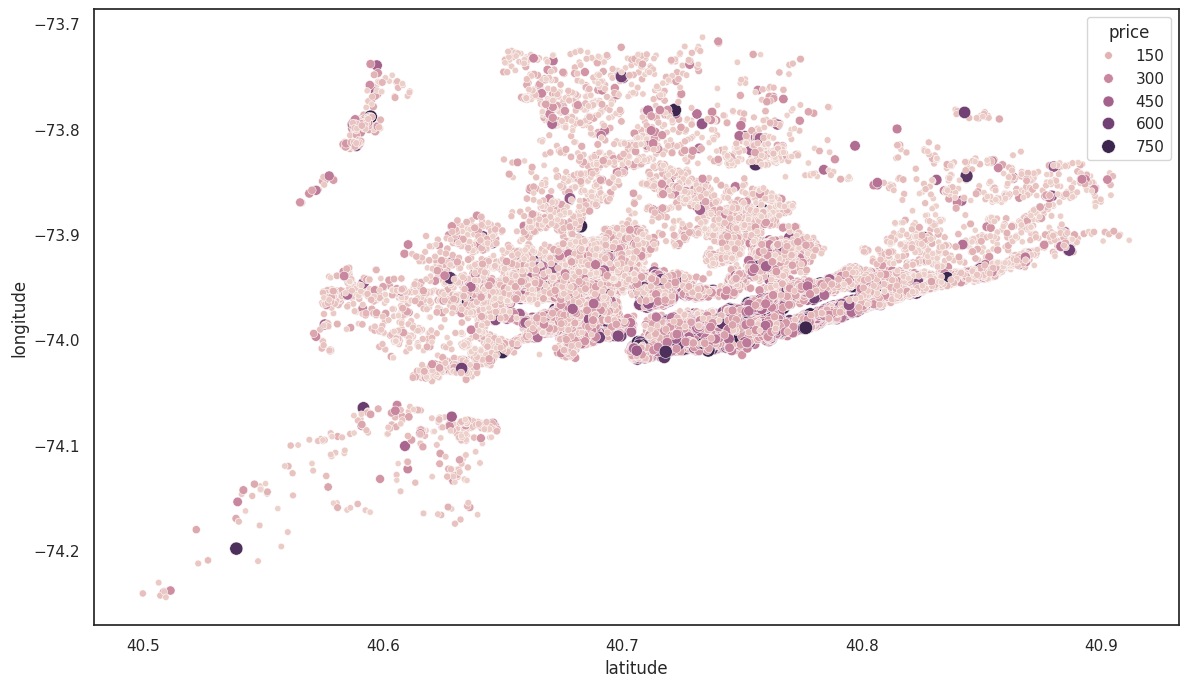

In [51]:
fig, ax = plt.subplots(figsize=(14, 8))
sns.scatterplot(x=df_new.latitude,y=df_new.longitude, size=df_new.price, hue=df_new.price,alpha=1,
                sizes=(20, 100))